In [80]:
import pandas as pd
import numpy as np
#from mpl_finance import candlestick_ohlc

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

In [90]:
## add the PD source and columns 
df = pd.read_json('BN-main/ADA_USDT-15m.json')
df.columns=['Date','Open','High','Low','Close','Volume']


#ada15['Open'].astype(float)



In [91]:
#start = pd.to_datetime('2020-01-01')
df['date']=df['Date']
df.Date=pd.to_datetime(df['Date'],unit='ms')

start = pd.to_datetime('2021-04-01')
end = pd.to_datetime('2021-04-02')
df = df.loc[(df['Date']> start)& (df['Date']< end)].copy()


df['Date'] = df['Date'].apply(mpl_dates.date2num)


for col in ['Open','High','Low','Close','Volume']:
    df[col].astype(float)
    

#df.Date(index)
#df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close,Volume,date
78607,737881.010417,1.19397,1.20000,1.19230,1.19941,2190115.0,1617236100000
78608,737881.020833,1.19921,1.20300,1.19500,1.19707,4024323.9,1617237000000
78609,737881.031250,1.19707,1.19900,1.19147,1.19440,1346353.5,1617237900000
78610,737881.041667,1.19465,1.19635,1.19300,1.19435,1618945.5,1617238800000
78611,737881.052083,1.19426,1.19472,1.18705,1.19104,2773703.8,1617239700000
...,...,...,...,...,...,...,...
78697,737881.947917,1.18818,1.18919,1.18666,1.18712,1685715.1,1617317100000
78698,737881.958333,1.18712,1.18840,1.18600,1.18679,2002136.8,1617318000000
78699,737881.968750,1.18680,1.18777,1.18333,1.18585,1907134.5,1617318900000
78700,737881.979167,1.18589,1.18631,1.18388,1.18511,994442.5,1617319800000


In [92]:
## support and resitance

def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
    return resistance

In [93]:
df.idxmin()
df.first_valid_index() - df.shape[0]-2
start = df.first_valid_index()+2
end =  (df.first_valid_index()+df.shape[0])-2
start

78609

In [94]:
## levels 
levels = []
for i in range(start,end):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))


In [95]:
#df = ada2021.loc[:,['Date','Open','High','Low','Close']]
df

,Date,Open,High,Low,Close,Volume,date
78607,737881.010417,1.19397,1.20000,1.19230,1.19941,2190115.0,1617236100000
78608,737881.020833,1.19921,1.20300,1.19500,1.19707,4024323.9,1617237000000
78609,737881.031250,1.19707,1.19900,1.19147,1.19440,1346353.5,1617237900000
78610,737881.041667,1.19465,1.19635,1.19300,1.19435,1618945.5,1617238800000
78611,737881.052083,1.19426,1.19472,1.18705,1.19104,2773703.8,1617239700000
...,...,...,...,...,...,...,...
78697,737881.947917,1.18818,1.18919,1.18666,1.18712,1685715.1,1617317100000
78698,737881.958333,1.18712,1.18840,1.18600,1.18679,2002136.8,1617318000000
78699,737881.968750,1.18680,1.18777,1.18333,1.18585,1907134.5,1617318900000
78700,737881.979167,1.18589,1.18631,1.18388,1.18511,994442.5,1617319800000


In [96]:
levels

[(78617, 1.19266),
 (78625, 1.19924),
 (78634, 1.181),
 (78640, 1.2077200000000001),
 (78651, 1.1815),
 (78653, 1.1927),
 (78661, 1.19243),
 (78667, 1.1997),
 (78676, 1.19463),
 (78683, 1.19165),
 (78689, 1.19065),
 (78692, 1.18286)]

In [97]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.02, \
                   colorup='green', colordown='red', alpha=0.2)

  date_format = mpl_dates.DateFormatter('%s %m %h %d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='blue')
  fig.show()

/Users/hjabbour/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


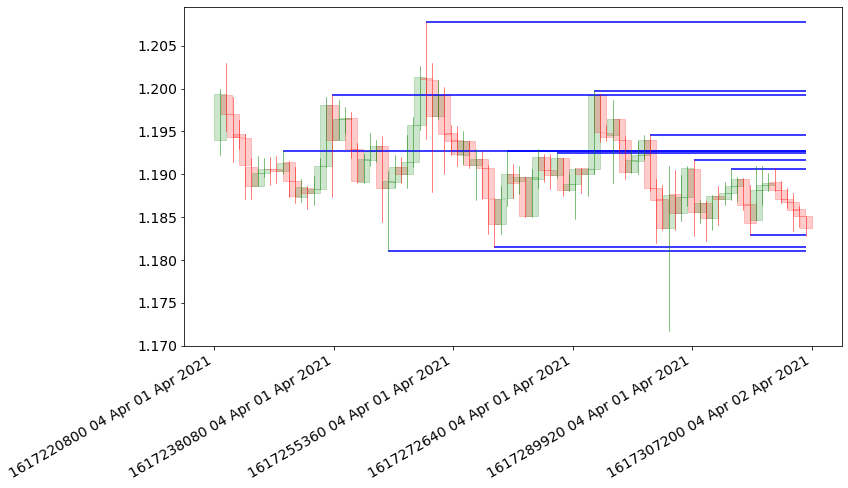

In [98]:
plot_all()